# 고윳값과 고유벡터의 해석

# 고윳값 구하기

In [17]:
import numpy as np

# 주어진 행렬 A
A = np.array([[1, 2], [3, 4]])

# A의 고유값과 고유벡터 계산
evals, evectors = np.linalg.eig(A)

In [18]:
# 고유값 방정식 검증
for i in range(len(evals)):
    lambda_i = evals[i]  # i번째 고유값
    v_i = evectors[:, i]  # i번째 고유벡터

    # Av 계산
    Av = A.dot(v_i)

    # lambda*v 계산
    lambda_v = lambda_i * v_i

    # 결과 출력
    print(f"고유값 {lambda_i}에 대해:")
    print("Av:", Av)
    print("lambda*v:", lambda_v)
    print("검증:", np.allclose(Av, lambda_v), "\n")  # Av와 lambda*v가 거의 같은지 검증

고유값 -0.3722813232690143에 대해:
Av: [ 0.30697009 -0.21062466]
lambda*v: [ 0.30697009 -0.21062466]
검증: True 

고유값 5.372281323269014에 대해:
Av: [-2.23472698 -4.88542751]
lambda*v: [-2.23472698 -4.88542751]
검증: True 



## 연습 문제 12-1

In [33]:
# create the matrix
A = np.random.randn(5,5)
A = A.T@A

# compute its inverse
Ai = np.linalg.inv(A)

# eigenvalues of A and Ai
eigvals_A  = np.linalg.eig(A)[0]
eigvals_Ai = np.linalg.eig(Ai)[0]

# compare them (hint: sorting helps!)
print('Eigenvalues of A:')
print(np.sort(eigvals_A))

print(' ')
print('Eigenvalues of inv(A):')
print(np.sort(eigvals_Ai))

print(' ')
print('Reciprocal of evals of inv(A):')
print(np.sort(1/eigvals_Ai))

Eigenvalues of A:
[ 0.0195554   0.07203818  1.53838673  5.59819507 10.57397378]
 
Eigenvalues of inv(A):
[ 0.09457183  0.178629    0.65003161 13.88152848 51.13676036]
 
Reciprocal of evals of inv(A):
[ 0.0195554   0.07203818  1.53838673  5.59819507 10.57397378]


# 고유벡터 찾기

In [46]:
A = np.random.randn(3,3)
evals, evecs = np.linalg.eig(A)
print(evals)

[ 0.31310565 -1.42482408 -0.43748258]


In [48]:
print(evecs)

[[ 0.12321898  0.32996806  0.20755388]
 [-0.85242069  0.83244645 -0.97754579]
 [ 0.50812995  0.44514491  0.0364089 ]]


## 연습 문제 12-2

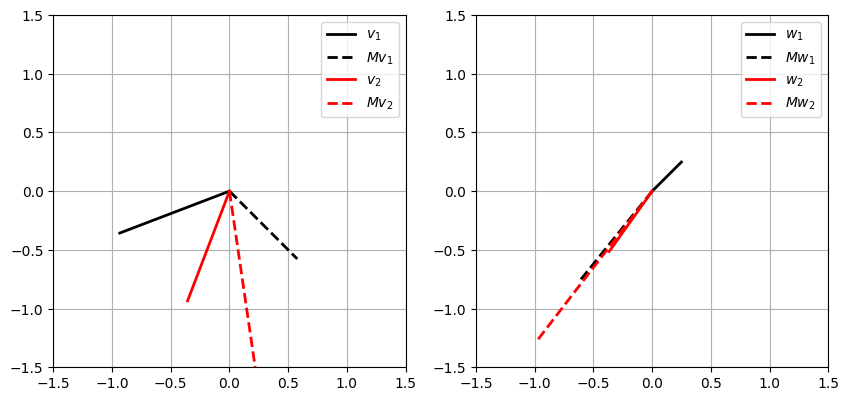

In [35]:
import matplotlib.pyplot as plt 

# the matrix
M = np.array([ [-1,1],
               [-1,2] ])

# its eigenvalues and eigenvectors
eigenvalues,eigenvectors = np.linalg.eig(M)

# some random vectors
notEigenvectors = np.random.randn(2,2)

# multipy to create new vectors
Mv = M @ eigenvectors
Mw = M @ notEigenvectors



## and now plot
_,axs = plt.subplots(1,2,figsize=(10,6))

# the two eigenvectors
axs[0].plot([0,eigenvectors[0,0]],[0,eigenvectors[0,1]],'k',linewidth=2,label='$v_1$')
axs[0].plot([0,Mv[0,0]],[0,Mv[0,1]],'k--',linewidth=2,label='$Mv_1$')

axs[0].plot([0,eigenvectors[1,0]],[0,eigenvectors[1,1]],'r',linewidth=2,label='$v_2$')
axs[0].plot([0,Mv[1,0]],[0,Mv[1,1]],'r--',linewidth=2,label='$Mv_2$')

# the two non-eigenvectors
axs[1].plot([0,notEigenvectors[0,0]],[0,notEigenvectors[0,1]],'k',linewidth=2,label='$w_1$')
axs[1].plot([0,Mw[0,0]],[0,Mw[0,1]],'k--',linewidth=2,label='$Mw_1$')

axs[1].plot([0,notEigenvectors[1,0]],[0,notEigenvectors[1,1]],'r',linewidth=2,label='$w_2$')
axs[1].plot([0,Mw[1,0]],[0,Mw[1,1]],'r--',linewidth=2,label='$Mw_2$')


# adjust the graphs a bit
for i in range(2):
  axs[i].axis('square')
  axs[i].set_xlim([-1.5,1.5])
  axs[i].set_ylim([-1.5,1.5])
  axs[i].grid()
  axs[i].legend()

plt.show()

# 정방 행렬의 대각화

In [52]:
evals, evecs = np.linalg.eig(matrix)
D = np.diag(evals)

In [54]:
print(evals)

[-0.37228132  5.37228132]


In [55]:
D

array([[-0.37228132,  0.        ],
       [ 0.        ,  5.37228132]])

## 연습 문제 12-3

In [36]:
# instructions don't specify matrix size; I'll use n=5
N = 5

# to store the reconstruction accuracies
reconAcc = np.zeros(4)


# Create a symmetric random-integers matrix
A = np.random.randn(N,N)
A = np.round( A.T+A )

# diagonalize the matrix
d,V  = np.linalg.eig(A)
D    = np.diag(d)

# demonstrate reconstruction accuracy
# remember that inv(V)=V.T!
Arecon = V @ D @ V.T
print(np.round( A-Arecon ,4))

reconAcc[0] = np.sqrt(np.sum( (A-Arecon)**2 ))
print(f'\nFrobenius distance: {reconAcc[0]}')

[[ 0.  0.  0.  0.  0.]
 [ 0.  0. -0. -0. -0.]
 [ 0. -0.  0.  0. -0.]
 [ 0. -0.  0.  0. -0.]
 [ 0. -0. -0. -0.  0.]]

Frobenius distance: 9.585041539977445e-15


In [37]:
# create D-tilde
Dtild = np.diag( d[np.random.permutation(N)] )

# test reconstruction accuracy
Arecon = V @ Dtild @ V.T
print(np.round( A-Arecon ,4))

reconAcc[1] = np.sqrt(np.sum( (A-Arecon)**2 ))
print(f'\nFrobenius distance: {reconAcc[1]}')

[[ 2.9366 -0.8439 -3.642   0.4942 -1.4252]
 [-0.8439 -0.819   2.7043  0.7125  1.1681]
 [-3.642   2.7043 -1.0878  1.2047  1.806 ]
 [ 0.4942  0.7125  1.2047 -3.4947 -1.0632]
 [-1.4252  1.1681  1.806  -1.0632  2.4649]]

Frobenius distance: 9.556602280084373


In [38]:
### swap only the two largest eigenvalues
evals_sort_idx = np.argsort(d) # note: default is to sort 
i = evals_sort_idx[np.r_[np.arange(N-2),N-1,N-2]][::-1]

# create D-tilde
Dtild = np.diag( d[i] )

# test reconstruction accuracy
Arecon = V @ Dtild @ V.T
print(np.round( A-Arecon ,4))

reconAcc[2] = np.sqrt(np.sum( (A-Arecon)**2 ))
print(f'\nFrobenius distance: {reconAcc[2]}')

[[ 0.2346  1.1359  0.8295 -0.3656  0.8167]
 [ 1.1359 -0.313   0.8034  2.1553 -0.0485]
 [ 0.8295  0.8034  0.061  -1.3318 -1.0331]
 [-0.3656  2.1553 -1.3318 -0.7232 -0.5143]
 [ 0.8167 -0.0485 -1.0331 -0.5143  0.7406]]

Frobenius distance: 4.856218975357484


In [39]:
### swap only the two smallest eigenvalues
evals_sort_idx = np.argsort(d) # note: default is to sort 
i = evals_sort_idx[np.r_[1,0,np.arange(2,N)]][::-1]

# create D-tilde
Dtild = np.diag( d[i] )

# test reconstruction accuracy
Arecon = V @ Dtild @ V.T
print(np.round( A-Arecon ,4))

reconAcc[3] = np.sqrt(np.sum( (A-Arecon)**2 ))
print(f'\nFrobenius distance: {reconAcc[3]}')

[[ 0.2525  0.0242  0.5356 -0.9412 -0.23  ]
 [ 0.0242 -1.0548  0.2786  1.9155  0.433 ]
 [ 0.5356  0.2786  1.0869 -2.4273 -0.5856]
 [-0.9412  1.9155 -2.4273 -0.2983 -0.0063]
 [-0.23    0.433  -0.5856 -0.0063  0.0136]]

Frobenius distance: 5.023662979880737


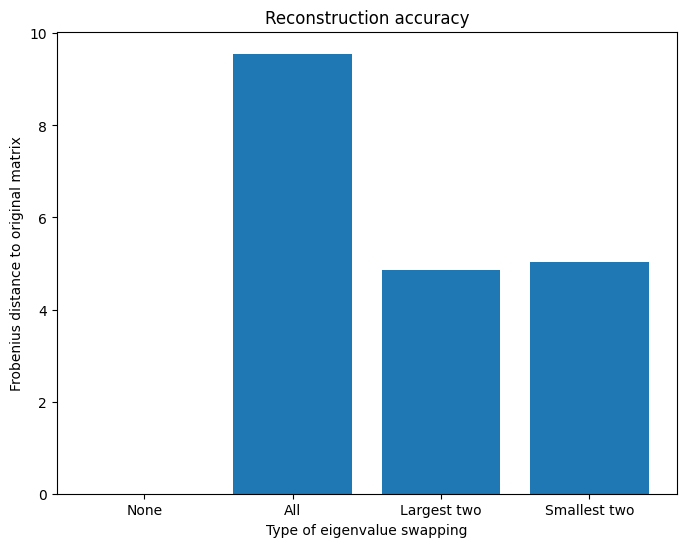

In [40]:
# now for the plot

plt.figure(figsize=(8,6))

plt.bar(range(4),reconAcc)
plt.xticks(range(4),labels=['None','All','Largest two','Smallest two'])
plt.ylabel('Frobenius distance to original matrix')
plt.xlabel('Type of eigenvalue swapping')
plt.title('Reconstruction accuracy')

plt.show()

# 대칭 행렬의 특별함

## 직교 고유벡터

In [56]:
A = np.random.randint(-3, 4, (3, 3))
A

array([[-3, -2, -2],
       [-3,  2, -2],
       [-2, -2,  1]])

In [57]:
A = A.T@A
A

array([[22,  4, 10],
       [ 4, 12, -2],
       [10, -2,  9]])

In [58]:
L, V = np.linalg.eig(A)

In [59]:
# all pairwise dot products
print( np.dot(V[:,0],V[:,1]) )
print( np.dot(V[:,0],V[:,2]) )
print( np.dot(V[:,1],V[:,2]) )

-1.1102230246251565e-16
2.220446049250313e-16
5.551115123125783e-17


## 실수 고윳값

In [61]:
A = np.array([[-3, -3, 0],
              [ 3, -2, 3],
              [ 0,  1, 2]])

In [64]:
L, V = np.linalg.eig(A)
L

array([-2.744739  +2.85172624j, -2.744739  -2.85172624j,
        2.48947801+0.j        ])

In [65]:
L.reshape(-1, 1)

array([[-2.744739  +2.85172624j],
       [-2.744739  -2.85172624j],
       [ 2.48947801+0.j        ]])

In [66]:
A = np.array([[-3, -3, 0],
              [-3, -2, 1],
              [ 0,  1, 2]])

L, V = np.linalg.eig(A)
L.reshape(-1, 1)

array([[-5.59707146],
       [ 0.22606174],
       [ 2.37100972]])